In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read csv file
df=pd.read_csv("Position_Salaries.xls")

In [3]:
#print df
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


# Insights:
Total columns=3

Total rows:10

null values are not present in the dataset

In [5]:
#check null values are present or not
df.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Business Analyst'),
  Text(1, 0, 'Junior Consultant'),
  Text(2, 0, 'Senior Consultant'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Country Manager'),
  Text(5, 0, 'Region Manager'),
  Text(6, 0, 'Partner'),
  Text(7, 0, 'Senior Partner'),
  Text(8, 0, 'C-level'),
  Text(9, 0, 'CEO')])

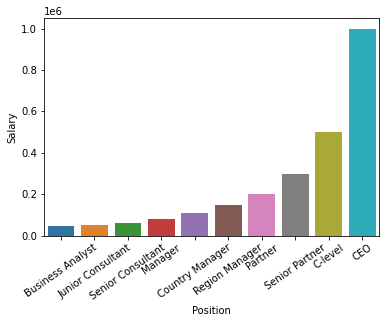

In [6]:
#find positionof highest salary
sns.barplot(data=df,x="Position",y="Salary")
plt.xticks(rotation=35)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in df.iloc[:,1:-1]:
    df[i]=ss.fit_transform(df[[i]])

In [7]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Insights:
We have used scaling to improve accuracy of our model.

In [8]:
#Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Position"]= label_encoder.fit_transform(df["Position"])

In [9]:
#seperate x & y
x=df.iloc[:,:-1]
x

,Position,Level
0,0,1
1,4,2
2,8,3
3,5,4
4,3,5
5,7,6
6,6,7
7,9,8
8,1,9
9,2,10


In [10]:
y=df["Salary"]
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [11]:
#train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [12]:
#build model
from sklearn.svm import SVR
sr=SVR(kernel="rbf")
sr.fit(xtrain,ytrain)
ypred=sr.predict(xtest)

In [13]:
ypred

array([129999.94528417, 130000.90057114])

In [14]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(ytest,ypred)

In [15]:
mse

380899212673.4112

In [16]:
r2score=r2_score(ytest,ypred)

In [17]:
r2score

-0.7243060781956143